<b>Lab02: Matplotlib-Visualize Data</b></br>
Họ và tên: Nguyễn Mạnh Hùng</br>
MSSV: 20127030</br>

<i> Cài đặt thư viện</i>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Các phiên bản của Numpy, Panda và Seaborn

In [49]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.21.5
1.4.4
0.12.2


Như vậy, các phiên bản thư viện được dùng cho đồ án này là numpy(1.21.5), panda(1.4.4) và seaborn(0.12.2)

<b>Các phần đã làm được trong đồ án kỳ này</b>
<ul>
  <li>Part 1: Data preprocessing - Hoàn thành 100%</li>
    <ul>
      <li>Đọc dữ liệu bằng thư viện Pandas</li>
      <li>Phân tích dữ liệu và lọc nhiễu</li>
    </ul>
  <li>Part 2: Visualize data using Matplotlib - Hoàn thành 100%
    <ul>
      <li>Line Graph - plot default</li>
      <li>Barplot</li>
      <li>Pie Chart</li>
      <li>Scatter plot</li>
    </ul>
  </li>
  <li>Part 3: Visualize new dataset with Seaborn and compare to Matplotlib (bonus) - Hoàn thành 100%</li>
    <ul>
      <li>Đọc và xử lý dữ liệu bằng thư viện Pandas</li>
      <li>Phát họa barplot, joinplot, boxplot, heatmap, scatterplot và so sánh</li>
    </ul>
  </li>
</ul>

Nguồn tài liệu tham khảo:</br>
+) Slide và dataset (covid-19) thầy Hùng cung cấp.</br>
+) Matplotlib: https://www.w3schools.com/python/matplotlib_pyplot.asp </br>
+) Seaborn: https://www.geeksforgeeks.org/python-seaborn-tutorial/ </br>
+) Pandas: https://towardsdatascience.com/10-most-frequently-asked-pandas-questions-on-stack-overflow-b9d7d94cd83e

# Part 1: Pre-processing data

<i> Đọc file csv được cung cấp</i>

In [50]:
df = pd.read_csv('covid-19-cases.csv') # tên file là covid-19-cases.csv
df

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,7/5/2021,7/6/2021,7/7/2021,7/8/2021,7/9/2021,7/10/2021,7/11/2021,7/12/2021,7/13/2021,7/14/2021
0,0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,...,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643
1,1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,...,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616
2,2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,...,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797
3,3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,...,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167
4,4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,...,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,...,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239
275,275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,...,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409
276,276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,...,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964
277,277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,...,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549


Khái quát hóa data frame

In [51]:
df.columns # liệt kê tên các biến

Index(['Unnamed: 0', 'Province/State', 'Country/Region', 'Lat', 'Long',
       '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020',
       ...
       '7/5/2021', '7/6/2021', '7/7/2021', '7/8/2021', '7/9/2021', '7/10/2021',
       '7/11/2021', '7/12/2021', '7/13/2021', '7/14/2021'],
      dtype='object', length=545)

In [52]:
num_rows, num_cols = df.shape
print(f"Dữ liệu có {num_rows} dòng và {num_cols} cột")

Dữ liệu có 279 dòng và 545 cột


<b> Như vậy dữ liệu có số lượng biến là 545 (tương ứng với tên các biến đã được liệt kê ở trên) và có 279 dòng dữ liệu</b>

Hiển thị kiểu dữ liệu của mỗi cột.

In [53]:
df.dtypes

Unnamed: 0          int64
Province/State     object
Country/Region     object
Lat               float64
Long              float64
                   ...   
7/10/2021           int64
7/11/2021           int64
7/12/2021           int64
7/13/2021           int64
7/14/2021           int64
Length: 545, dtype: object

<i>Kiểm tra xem có phần tử NaN hay dữ liệu trùng lắp hay không?

In [54]:
has_duplicate = df.duplicated().sum() > 0
has_duplicate

False

Do kết quả trả về là False nên kết quả cho thấy không có trùng lắp dữ liệu

<i> Kiểm tra các cột có phần tử NaN</i>

In [55]:
df.isnull().values.any()

True

Ta thấy có phần tử dữ liệu trống dữ liệu

Kiểm tra chi tiết các vùng chứ dữ liệu trống (NaN)

In [56]:
print('Số phần tử dữ liệu trống:', df.isnull().sum().sum())

Số phần tử dữ liệu trống: 196


In [57]:
print('Số phần tử dữ liệu trống ở các cột')
for column in df:
    if df[column].isnull().sum().sum() != 0:
        print(column + ': ' + str(df[column].isnull().sum().sum()))

Số phần tử dữ liệu trống ở các cột
Province/State: 192
Lat: 2
Long: 2


<b> Ta có thể thấy, thuộc tính Province/State chiếm tỉ lệ quá cao - 68,82% trong khi các thuộc tính còn lại chiếm tỷ lệ khá thấp </b>

Tiếp đến ta sẽ lắp các chỗ giá trị NaN thành 0 đối với Lat và Long

In [58]:
df['Lat'] = df['Lat'].replace(np.nan, np.float64(0))
df['Long'] = df['Long'].replace(np.nan, np.float64(0))

Kiểm tra kết quả sau khi lắp

In [59]:
print('Lat', df['Lat'].isnull().sum().sum())
print('Long', df['Long'].isnull().sum().sum())

Lat 0
Long 0


<b> Kết luận: như vậy dữ liệu đã được làm sạch và chuẩn bị cho việc vẽ biểu đồ.

# Part 2: Plotting on Matplotlib

<i>Plot default: Ta sẽ chọn các giá trị bất kỳ và vẽ chúng thành biểu đồ đường và nhận xét.

Ta khảo sát tổng số ca nhiễm Covid-19 trên toàn cầu vào 5 ngày liên tiếp, bắt đầu từ ngày 22/1/2020 đến 26/1/2020.

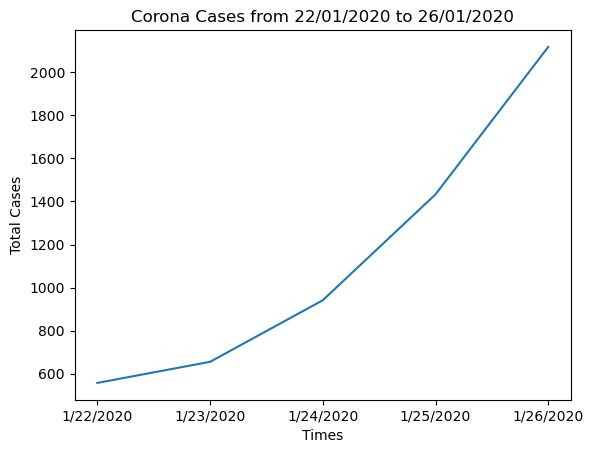

In [60]:
label=np.array([df['1/22/2020'].sum(),df['1/23/2020'].sum(),df['1/24/2020'].sum(),
                df['1/25/2020'].sum(),df['1/26/2020'].sum()])
plot_default = plt.plot(['1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020'], label)
plt.title("Corona Cases from 22/01/2020 to 26/01/2020")
plt.xlabel("Times")
plt.ylabel("Total Cases")
plt.show()

<b> Kết luận: Ta có thể thấy rằng, với ngày bắt đầu khảo sát (22/1/2020), tổng số ca nhiễm trên toàn cầu chỉ có gần 600 ca nhiễm, nhưng chỉ sau 4 ngày (26/1/2020) thì con số đã tăng lên đến hơn 2000. Qua đó, cho thấy sự lây lan với tốc độ khá nhanh đối với loại bệnh này. Đặc biệt là khoảng 24/1 - 26/1 thì tốc độ tăng trưởng gần như là bùng nổ.

<i>Phát họa barchart cho dữ liệu.</i>

Ta lần lượt chọn lọc các quốc gia có số tỉnh/bang (province/state) được liệt kê trong bảng dữ liệu.

In [61]:
country = df.groupby('Country/Region').size().sort_values(ascending=False)
top_country_val = country.values[:10] # rút giá trị số tỉnh/ bang của top 10 quốc gia được ghi nhận
top_country = country.index.values[:10] # rút tên của top 10 quốc gia được ghi nhận

Kết quả của top 10

In [62]:
country.head(10)

Country/Region
China             34
Canada            16
United Kingdom    12
France            12
Australia          8
Netherlands        5
Denmark            3
New Zealand        2
Palau              1
Nicaragua          1
dtype: int64

Phát họa barplot cho các dữ liệu trên

Text(0, 0.5, 'Number of provinces/states')

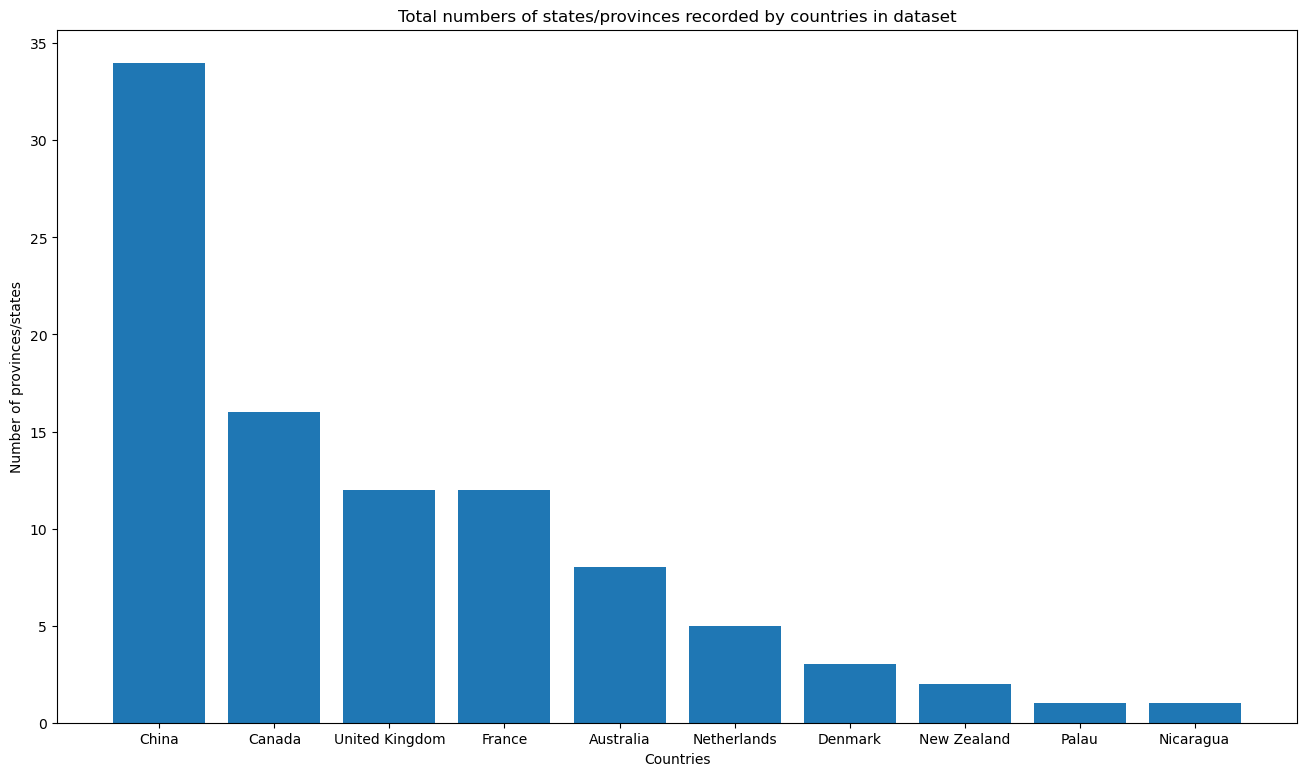

In [63]:
plt.figure(figsize=(16,9))
plt.bar(top_country, top_country_val)
plt.title('Total numbers of states/provinces recorded by countries in dataset')
plt.xlabel('Countries')
plt.ylabel('Number of provinces/states')

<i>Phác họa Pie chart</i>

Ta tiến hành rút trích số liệu ca nhiễm từ 4 nước lần lượt là Mỹ, Brazil, Ấn Độ và Nga. Đầu tiên rút trích index của 4 nước trong data frame

In [64]:
label = ['US', 'Brazil', 'India', 'Russia']
index_country = []
for i in label:
    index_country.append(np.int64(df.index[df['Country/Region'] == i]))
index_country = np.array(index_country, dtype=np.int64)

Do kết quả thu được là vector cột nên ta cần phải reshape lại thành vector dòng

In [65]:
index_country.reshape(-1)

array([254,  30, 147, 217], dtype=int64)

Sau khi có được các chỉ số index, ta sẽ tiến hành rút trích số liệu ca nhiễm của mỗi quốc gia vào ngày 14/7/2021

In [66]:
time_column = []
for i in index_country:
    time_column.append(df.iloc[np.int64(i)]['7/14/2021'])
time_column = np.array(time_column, dtype=np.int64)

In [67]:
time_column.ravel()

array([33947230, 19209729, 30987880,  5785542], dtype=int64)

In [68]:
time_column.shape

(4, 1)

Lúc này ta có thể thấy phần tử mảng vẫn ở dạng 2D với size 4x1 nên ta phải chuyển về dạng vector để vẽ biểu đồ tròn.

In [69]:
result_list = []
for i in range(len(time_column)):
    for j in range(len(time_column[0])):
        result_list.append(time_column[i][j])
result_list = np.array(result_list)

In [70]:
result_list.shape

(4,)

Sau khi chuyển về dạng vector, ta bắt đầu tiến hành vẽ biểu đồ tròn.

([<matplotlib.patches.Wedge at 0x23fe8020d30>,
 [Text(0.413010113748076, 1.0195207923047973, 'US'),
  Text(-1.0946432703877509, 0.10842559935185742, 'Brazil'),
  Text(0.0923550631724566, -1.0961161171638758, 'India'),
  Text(1.0776097252032593, -0.2208105073300552, 'Russia')])

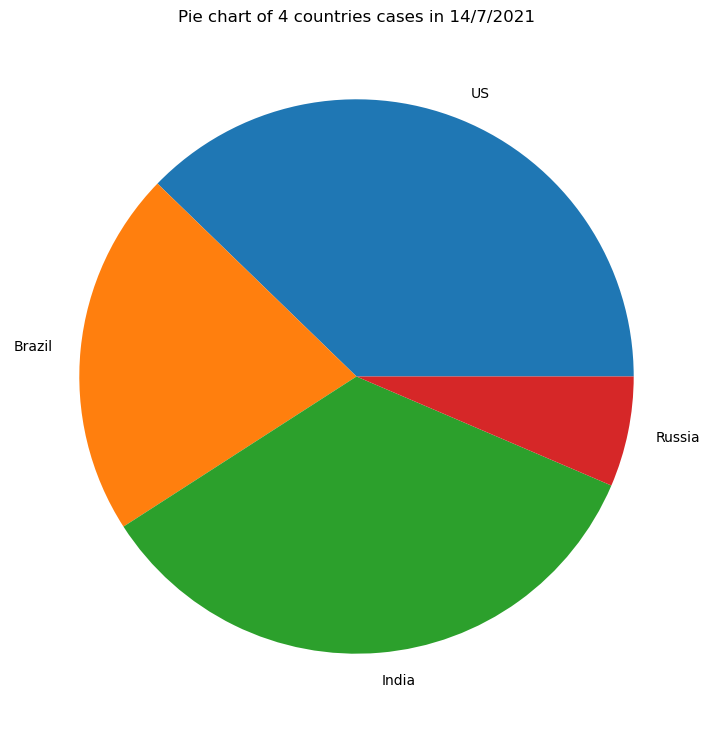

In [71]:
plt.figure(figsize=(16,9))
plt.title('Pie chart of 4 countries cases in 14/7/2021')
plt.pie(result_list, labels= label)

<b> Kết luận: Như vậy ta có thể thấy Mỹ chiếm tỷ lệ ca nhiễm cao nhất (khoảng 45%), theo sau là Ấn Độ (khoảng 38%). Chiếm tỷ lệ thấp nhất trong 4 nước là Nga.

<i> Scatter Plot</i>

Ta lần lượt theo dõi số ca covid của đất nước Ý trong khoảng thời gian từ 18/2/2020 đến 29/2/2020 

Đánh dấu các mốc thời gian

In [72]:
time_column = ['2/18/2020',	'2/19/2020', '2/20/2020', '2/21/2020', '2/22/2020',	'2/23/2020', 
               '2/24/2020', '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020']

Thiết lập hàm rút trích dữ liệu của nước Ý

In [73]:
def Italian_Reporter(time_column, df):
    AnhNgok = 'Italy'
    khong_an_mung = np.int64(df.index[df['Country/Region'] == AnhNgok])
    
    tinchuan = []
    for i in time_column:
        tinchuan.append(df.at[khong_an_mung[0],i])
    tinchuan = np.array(tinchuan, dtype=np.int64)
    an_block = tinchuan.reshape(-1)
    return an_block

Thực hiện rút trích dữ liệu

In [74]:
block = Italian_Reporter(time_column, df)

Text(0.5, 1.0, 'Italian total cases in 18/2 - 29/2/2020')

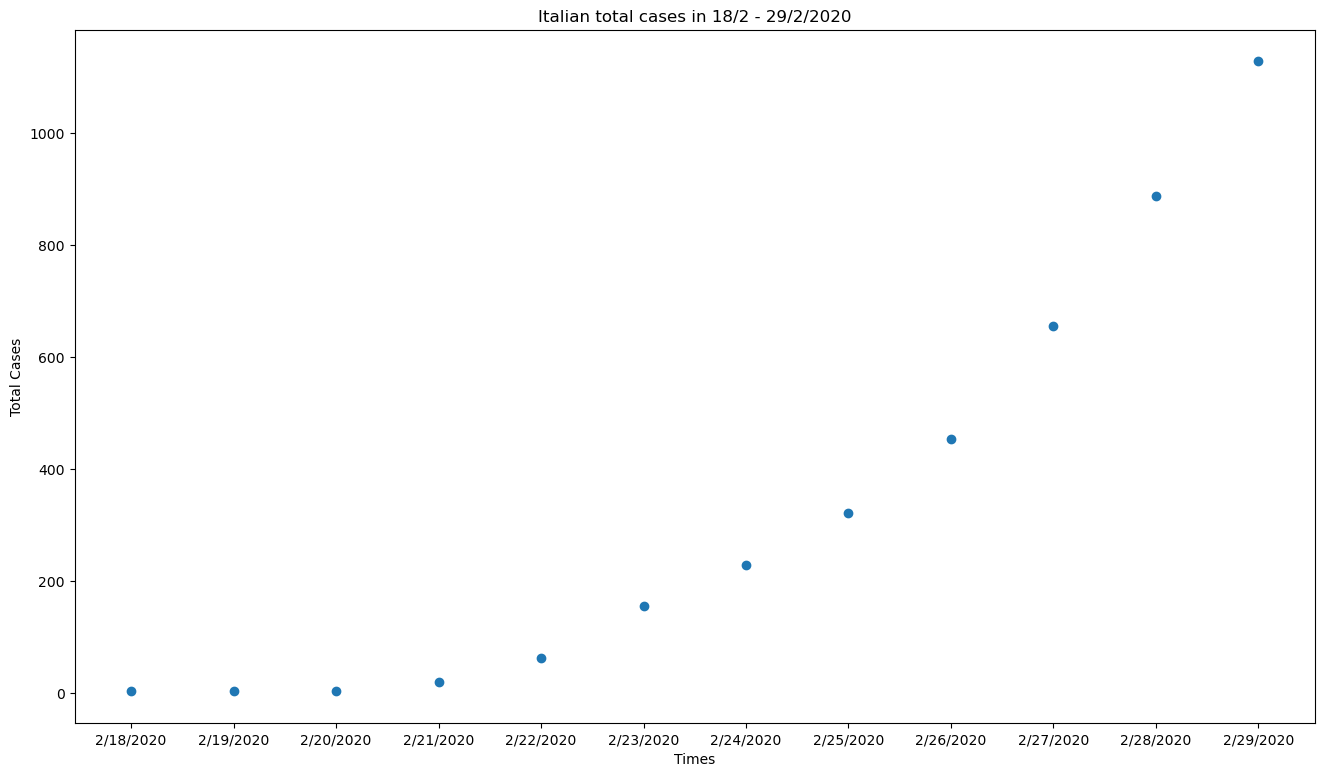

In [75]:
plt.figure(figsize=(16,9))
plt.scatter(time_column, block)
plt.xlabel('Times')
plt.ylabel('Total Cases')
plt.title('Italian total cases in 18/2 - 29/2/2020')

<b> Kết luận: Ta có thể thấy, số ca nhiễm Covid của nước Ý (Italia) đã tăng đột biến từ 2 ca đến hơn 1000 ca chỉ trong vòng 11 ngày.</b>

<i> Plot with grouping</i>

Phát thảo top 10 quốc gia có tổng số ca mắc Covid 19 lớn nhất thế giới

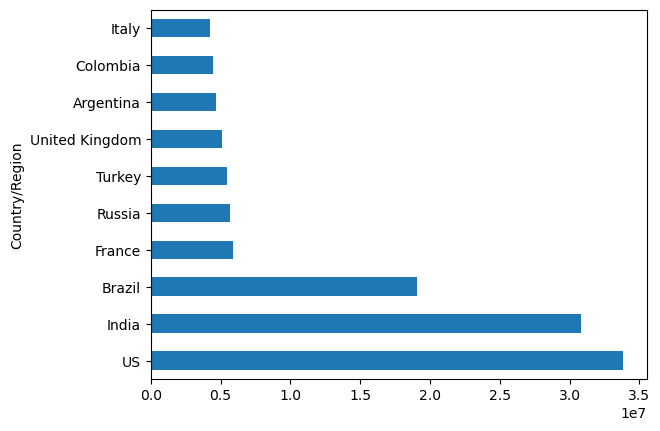

<Figure size 1600x900 with 0 Axes>

In [76]:
cat_totals = df.groupby("Country/Region")["7/10/2021"].sum().sort_values(ascending=False)
cat_totals = cat_totals[:10]
plot_grouping = cat_totals.plot(kind="barh", fontsize=10)
plt.figure(figsize=(16,9))
plt.show()


<b> Kết luận: Ta thấy Mỹ, Ấn Độ và Brazil có tổng số ca mắc Covid 19 nhiều nhất thế giới vào ngày 10/7/2021

# Part 3: Sử dụng Thư Viện Seaborn để trực quan hóa dữ liệu cho file data mới.(Bonus)

Đọc dữ liệu mới, dữ liệu ghi nhận các số liệu về các thông số về đáng giá chi tiết của các bộ phim lẻ 1980 - 2016.</br>
link dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies

In [77]:
df = pd.read_csv('movies.csv') # tên file là movies.csv
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [78]:
# Trình bày size của data frame
df.shape

(7668, 15)

<i>Ta thấy dữ liệu có 15 biến và có số lượng mẫu là 7668.</i>

Mô tả dữ liệu

In [79]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

Tổng quát các biến của dataset</br>
+)budget: Ngân sách của bộ phim. Bằng 0 nếu không có thông tin</br>
+)company: Công ty sản xuất</br>
+)country: Quốc gia xuất xứ</br>
+)director: Tên đạo diễn</br>
+)genre: Thể loại</br>
+)gross: Doanh thu</br>
+)name: Tên phim</br>
+)rating: mác kiểm duyệt (R, PG, etc.)</br>
+)released: Ngày công chiếu (YYYY-MM-DD)</br>
+)runtime: thời lượng</br>
+)score: IMDb rating</br>
+)votes: Số người dùng vote</br>
+)star: Diễn viên chính</br>
+)writer: Biên kịch viên</br>
+)year: Năm phát hành</br>

Kiểm tra liệu có tồn tạo dữ liệu trống

In [80]:
# checking if the dataset has missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Mô tả kiểu dữ liệu cho từng biến

In [81]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

<i> Scatter plot giữa sự tương quan của doanh thu và ngân sách

Text(0.5, 1.0, 'Budget vs. gross income')

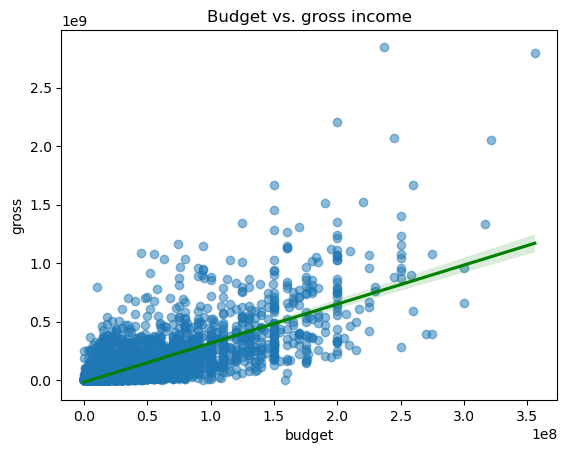

In [82]:
sns.regplot(data=df, x='budget', y='gross', scatter_kws={'alpha':0.5}, line_kws={'color': 'green'})
plt.title("Budget vs. gross income")

<b> Kết luận: như vậy khi vốn đầu tư tăng thì xu hướng của doanh thu phim cũng sẽ tăng theo đường thẳng màu xanh được mô phỏng.</b>

<i>Vẽ Barplot cho data</i>

<AxesSubplot: xlabel='gross', ylabel='country'>

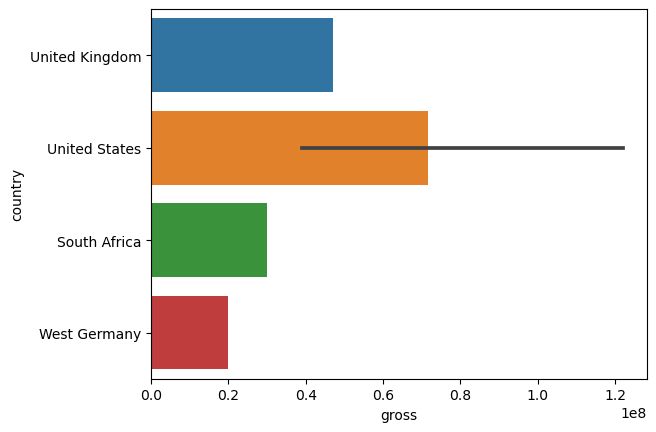

In [83]:
sns.barplot(x = 'gross',  y = 'country', data = df[:25])

<b>Kết luận: như vậy ta có thể thấy, Mỹ là nước có doanh thu cao nhất trong 25 dòng dữ liệu đầu tiên. Thấp nhất là Tây Đức</b> 

<i>Correlation heatmap</i>

<AxesSubplot: >

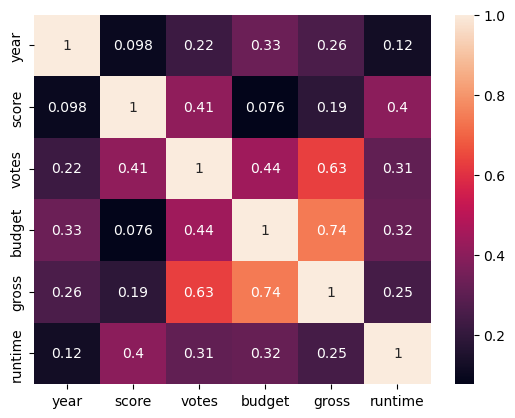

In [84]:
sns.heatmap(df.corr(),annot=True)

<b> Kết luận: ta có thể thấy được các hệ số tương quan giữa các biến với nhau thông qua colorheatmap chart. Ta có thể nhận ra rằng các phiếu đánh giá (votes) và ngân sách đầu tư làm phim (budget) có ảnh hưởng lớn tới doanh thu (gross) của phim.</b>

<i> Distribution plot</i>

<AxesSubplot: xlabel='score', ylabel='country'>

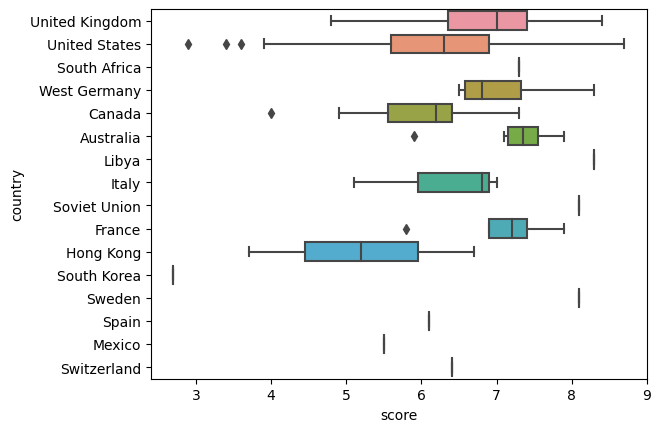

In [85]:
sns.boxplot(x= 'score', y= 'country', data= df[:300])

<b> Kết luận: qua biểu đồ trên, ta có thể thấy rằng trong các năm đầu thập niên 80, ta thấy Mỹ là quốc gia có độ phủ điểm số cao nhất, trong khi Hàn Quốc, Tây Ban Nha, Mexico hầu như chỉ có một phổ điểm dữ liệu(có thể do dữ liệu quá ít). Ngoài ra, ta có thể thấy Anh có chất lượng phim trung bình tốt nhất, kế đến là Mỹ, HongKong có chất lượng phim trung bình thấp nhất trong tất các các nước có sản lượng phim cao.</b> 

<i>Join plot</i>

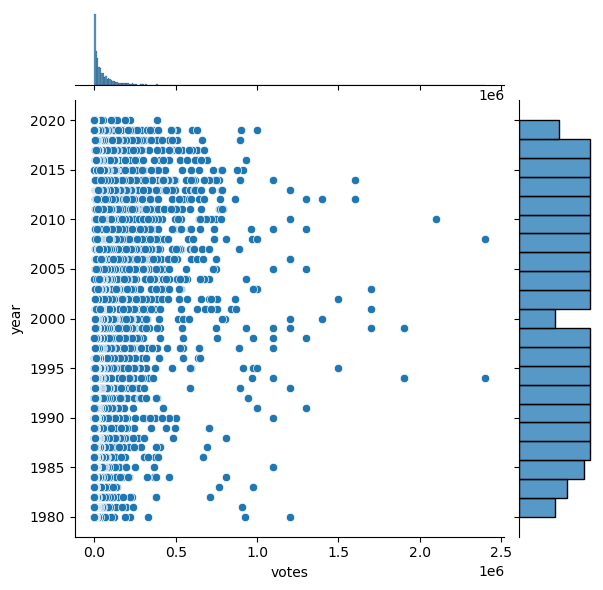

In [86]:
sns.jointplot(x = "votes", y = "year", kind = "scatter", data = df)

<b>Kết luận: như vậy ta có thể nhận ra rằng các bộ pim vào các thời thệp niên 80-90 thì có lượt đánh giá ít hơn so với các năm 2010-2020. Điều đó có thể là do với sự bùng nổ của công nghệ thông tin, mạng internet mà các phương tiện thông tin đại đại chúng đã tiếp cận dễ dàng hơn và khách quan hơn. Từ đó, số lượng người truy cập ngày càng gia tăng và lượt đánh giá của phim đã tăng lên đáng thấy.</b>

<b><i>So sánh</i></b></br>
So với các phần phát họa dữ liệu của Matplotlib, ta có thể thấy thư viện seaborn dễ sử dụng và tin dùng hơn trong việc trực quan hóa dữ liệu. Chúng chỉ cần gọi hàm tương ứng và truyền các tham số các biến dữ liệu tương ứng thì ta đã thu được đồ thị như mong muốn, riêng scatterplot có thể mô phỏng được đồ thị xu hướng chung cho tất cả các điểm dữ liệu. Trong khi matplotlib, ta cần phải xử lý, rút trích các label và data theo từng index và tên biến để có được tập dữ liệu để phát họa đồ thị.</br>
Ngoài ra, seaborn chỉ hỗ trợ các barplot, boxplot, histogram, scatterplot, join plot nhưng không hỗ trợ về pie chart. Trong khi Matplotlib lại hỗ trợ về pie chart.